<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import cv2 as cv
import requests
from io import BytesIO
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
import urllib.request
import random

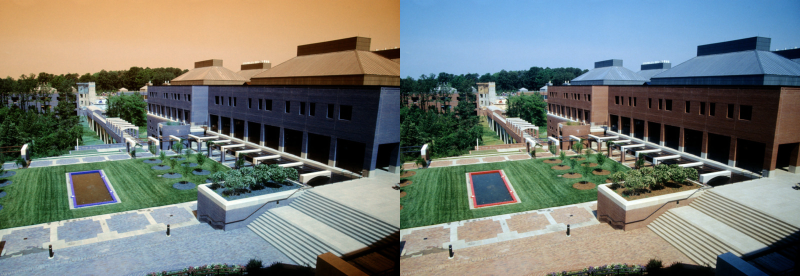

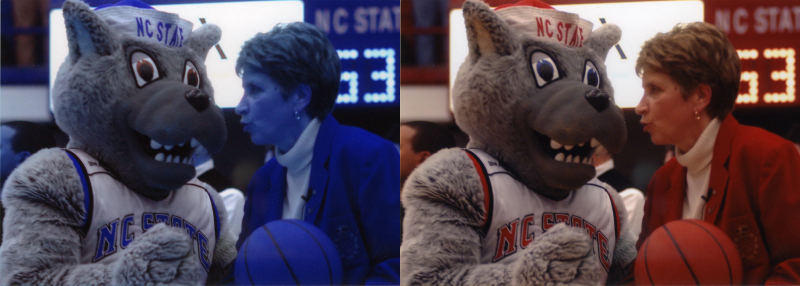



Error loading image from https://www.newsdone.com/wp-content/uploads/2020/08/cat-british-shorthair-cat-s-eyes-british.jpg: HTTP Error 403: Forbidden


In [110]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://www.newsdone.com/wp-content/uploads/2020/08/cat-british-shorthair-cat-s-eyes-british.jpg"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    try:
        image = io.imread(url)  # read image
        image = cv.resize(image, (0,0), fx=0.5, fy=0.5)  # resize image to half size
        image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert color to RGB
        final_frame = cv.hconcat([image, image_2])  # concatenate image
        cv2_imshow(final_frame)  # show image
        print('\n')
    except Exception as e:
        print(f"Error loading image from {url}: {e}")

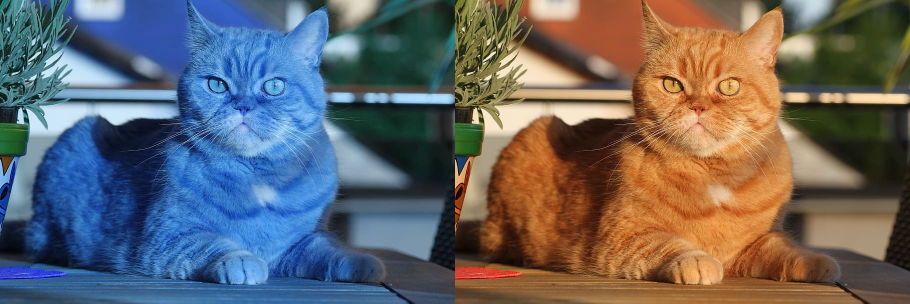

In [118]:
url = "https://www.newsdone.com/wp-content/uploads/2020/08/cat-british-shorthair-cat-s-eyes-british.jpg"

headers = {"User-Agent": "Mozilla/5.0"}


try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    image = Image.open(BytesIO(response.content))
    image = np.array(image)

    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    final_frame = cv.hconcat([image, image_2])
    cv2_imshow(final_frame)
    print('\n')

except Exception as e:
    print(f"Error loading image from {url}: {e}")

resolusi image: tinggi x lebar =  304 x 455


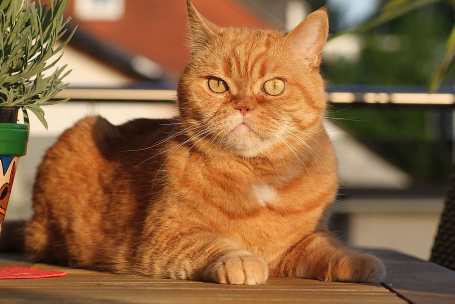

In [112]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi,"x",lebar)
cv2_imshow(image_2)

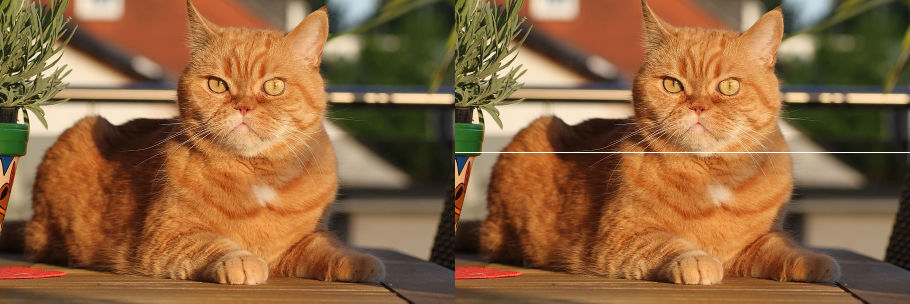

In [113]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)

**Pertanyaan**

1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?

  Jawab: Karena tools ini bersifat free. Penulisan kode program Python serta eksekusi kode program juga tidak memerlukan proses instalasi karena semua proses dilakukan di cloud. Selain itu fungsionalitas tambahan Python dapat juga memanfaatkan built-in library yang ada pada Google Colab.

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?
  
  Jawab:

  1. `numpy` (np): Untuk manipulasi array dan matriks yang merepresentasikan gambar.
  2. `pandas` (pd): Untuk manipulasi data tabular (biasanya tidak digunakan langsung dalam praktikum ini).
  3. `cv2` (cv): Untuk pemrosesan gambar seperti membaca, menulis, dan mengubah gambar.
  4. `google.colab.patches` (cv2_imshow): Untuk menampilkan gambar dalam notebook Colab.
  5. `skimage` (io dan transform): Untuk membaca dan melakukan transformasi gambar.
  6. `PIL` (Image): Untuk membuka dan memanipulasi gambar dalam berbagai format.
  7. `matplotlib.pylab` (plt): Untuk visualisasi gambar dan grafik.

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut: cv.resize(image, (0,0), fx=0.5, fy=0.5). Apa kegunaan kode program tersebut? Dan apa pengaruhnya jika tidak dilakukan?

  Jawab: Untuk mengubah ukuran gambar menjadi setengah dari gambar aslinya.

4. Apakah kegunaan kode [255,255,255] ? Jelaskan!
  
  Jawab: Untuk memberi warna putih pada garis.

5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun
rendah!

  Jawab: Resolusi gambar mengacu pada jumlah pixel yang membentuk gambar.

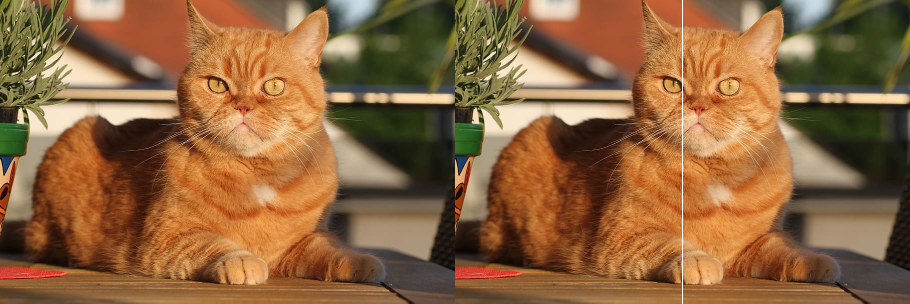

In [119]:
#TUGAS 1
#Membuat garis vertikal ditengah image

image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for x in range (tinggi):
  image_3[x, int(lebar/2)] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)

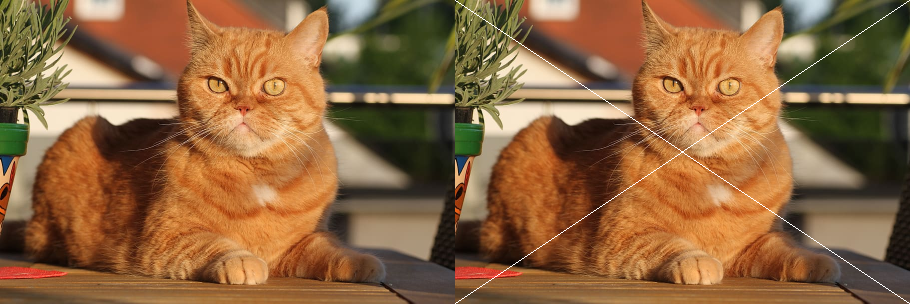

In [115]:
#TUGAS 2
# Membuat garis diagonal

image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

cv.line(image_3, (0, 0), (lebar - 1, tinggi - 1), (255, 255, 255))
cv.line(image_3, (0, tinggi - 1), (lebar - 1, 0), (255, 255, 255))

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)

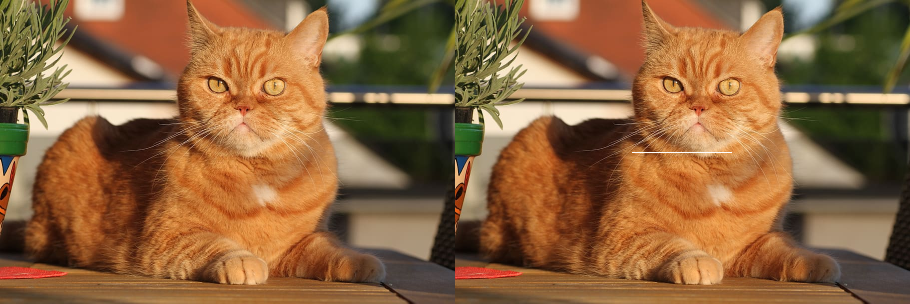

In [116]:
#TUGAS 3
# Membuat garis horizontal dengan panjang tertentu

tinggi, lebar, _ = image.shape

image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

panjang_garis = 100

tengah_y = int(tinggi / 2)

start_x = max(0, int(lebar / 2) - int(panjang_garis / 2))
end_x = min(lebar, int(lebar / 2) + int(panjang_garis / 2))

image_3[tengah_y, start_x:end_x] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)

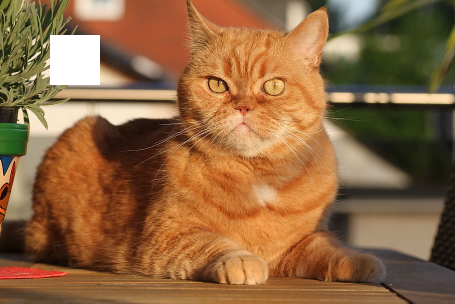

In [117]:
#TUGAS 4
# Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat

tinggi, lebar, _ = image.shape

lebar_kotak = 50
tinggi_kotak = 50

image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

x = random.randint(0, lebar - lebar_kotak)
y = random.randint(0, tinggi - tinggi_kotak)

image_3[y:y + tinggi_kotak, x:x + lebar_kotak] = [255, 255, 255]
cv2_imshow(image_3)

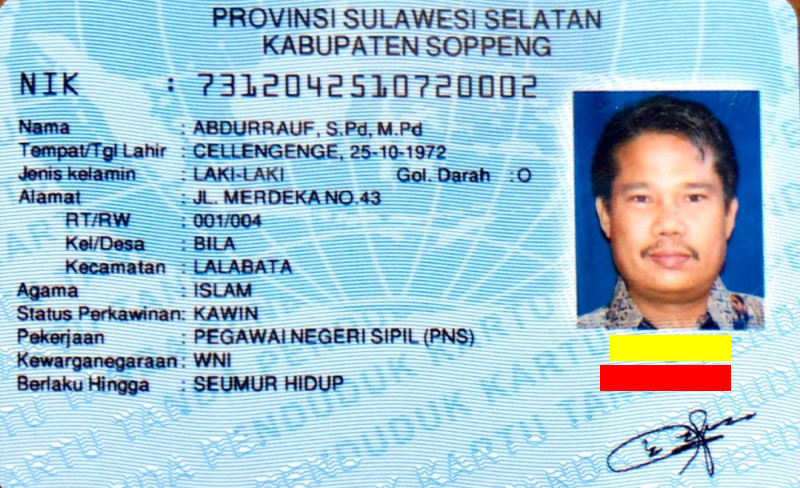

In [135]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/KTP.jpg')

# Menentukan posisi dan ukuran kotak pertama
x1, y1 = 610, 335
width, height = 120, 25

# Menggambar kotak pertama pada gambar
cv.rectangle(image, (x1, y1), (x1 + width, y1 + height), (0, 255, 255), -1)

# Menentukan posisi dan ukuran kotak kedua
x1, y1 = 600, 365
width, height = 130, 25

# Menggambar kotak kedua pada gambar
cv.rectangle(image, (x1, y1), (x1 + width, y1 + height), (0, 0, 255), -1)

# Menampilkan gambar yang telah dimodifikasi
cv2_imshow(image)


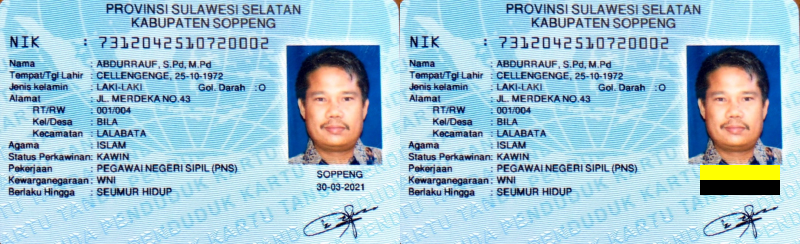

In [138]:
import requests
import cv2
from skimage import io as skio
from io import BytesIO

file_id = "1ox9S43QnYPQIErL76JEZqiE0IJ_CmPP_"
url_ktp = f"https://drive.google.com/uc?id={file_id}&export=download"

response = requests.get(url_ktp)
image_ktp = skio.imread(BytesIO(response.content))
image_ktp = cv.resize(image_ktp, (0,0), fx=0.5, fy=0.5)
imageKTP=cv.cvtColor(image_ktp, cv.COLOR_BGR2RGB)
imageORI=cv.cvtColor(image_ktp, cv.COLOR_BGR2RGB)

tinggi_kotak_atas = 15
lebar_kotak_atas = 80

tinggi_kotak_bawah = 15
lebar_kotak_bawah = 80

# Menggambar kotak
for x in range(tinggi_kotak_atas):
    for y in range(lebar_kotak_atas):
        imageKTP[x+180, y+300] = [0, 0, 0]

for x in range(tinggi_kotak_bawah):
    for y in range(lebar_kotak_bawah):
        imageKTP[x+165, y+300] = [0, 255, 255]

final_frame = cv.hconcat((imageORI, imageKTP))
cv2_imshow(final_frame)